In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'D:\KULIAH\SEMESTER 5\Data Sains\TV_Final.csv')
print(data)

       Brand     Resolution  Size   Selling Price  Original Price  \
0    TOSHIBA   Ultra HD LED     55          37999           54990   
1       TCL   QLED Ultra HD     55          52999          129990   
2    realme          HD LED     32          13999           17999   
3        Mi          HD LED     32          14999           19999   
4    realme          HD LED     32          12999           21999   
..       ...            ...    ...            ...             ...   
907    SONY     Full HD LED     43          44999           57900   
908    SONY     Full HD LED     40          41499           51900   
909    SONY    Ultra HD LED     65         149990          184990   
910    SONY          HD LED     32          32900           32900   
911    SONY     Full HD LED     43          56900           56900   

    Operating System  Rating  
0              VIDAA     4.3  
1            Android     4.4  
2            Android     4.3  
3            Android     4.4  
4            And

In [3]:
data.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

In [4]:
data['Operating System'].value_counts()

Android      474
Tizen        145
Linux        127
WebOS        109
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

In [5]:
data['Rating']=data['Rating'].fillna(data['Rating'].mean())
data['Operating System']=data['Operating System'].fillna('Android')

In [6]:
data.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

In [7]:
data['Brand'].groupby(data['Brand']).count().sort_values(ascending=False)

Brand
SAMSUNG             140
LG                  122
SONY                 62
TCL                  44
Panasonic            30
Micromax             25
Vu                   23
Lloyd                22
Mi                   19
iFFALCON by TCL      19
Sansui               18
Thomson              18
Haier                18
PHILIPS              17
MOTOROLA             15
KODAK                15
Blaupunkt            15
TOSHIBA              13
IMPEX                13
Onida                12
Croma                12
Candes               12
Nokia                11
Power Guard          11
T-Series             11
Hisense              10
Acer                  9
RGL                   9
OnePlus               9
Coocaa                9
CloudWalker           9
G-TEN                 8
MarQ by Flipkart      8
AISEN                 8
Sharp                 8
Onix                  8
realme                7
Adsun                 7
Intex                 7
HUIDI                 6
Akai                  6
Dyanora   

In [8]:
rating5=data['Rating']>=5
data['Brand'][rating5].value_counts()

LG         7
SAMSUNG    3
SONY       2
Haier      2
Intex      1
Onida      1
Lloyd      1
Croma      1
Name: Brand, dtype: int64

In [9]:
 round(data.groupby('Brand')['Rating'].mean().sort_values(ascending=False),1)

Brand
SONY                4.5
OnePlus             4.4
Vu                  4.4
MOTOROLA            4.3
Haier               4.3
Hisense             4.3
Compaq              4.3
Mi                  4.3
Onida               4.3
TOSHIBA             4.3
Thomson             4.3
KODAK               4.3
realme              4.3
iFFALCON by TCL     4.3
MarQ by Flipkart    4.3
LG                  4.3
Nokia               4.3
SAMSUNG             4.3
Onix                4.3
Dektron             4.3
Coocaa              4.2
Blaupunkt           4.2
Weston              4.2
Akai                4.2
Power Guard         4.2
Sun King            4.2
KRISONS             4.2
VG                  4.2
Oxygen              4.2
TCL                 4.2
Panasonic           4.2
Infinix             4.2
Sanyo               4.2
IMPEX               4.2
Croma               4.2
Intex               4.2
Sansui              4.2
LumX                4.2
T-Series            4.2
Micromax            4.1
PHILIPS             4.1
HUIDI     

In [18]:
round(data.groupby('Brand')['Selling Price'].mean().sort_values(ascending=True),1)

Brand
KRISONS               5865.7
Dektron               6724.0
Maser                 7499.0
Skyworth              8659.0
RGL                  11106.4
MURPHY               12817.2
Candes               13415.7
Adsun                15220.4
Dyanora              15515.7
G-TEN                16918.4
Infinix              17165.7
T-Series             17179.2
MarQ by Flipkart     17749.0
DETEL                18110.7
HUIDI                18165.7
VG                   19492.2
Croma                22365.7
KODAK                23665.1
Blaupunkt            23712.3
realme               24427.6
Coocaa               24442.4
LumX                 24858.3
Sun King             24999.0
Thomson              25249.0
Micromax             26869.6
Intex                27340.7
IMPEX                28819.4
Onida                29707.2
Power Guard          30509.7
Mi                   30787.1
Acer                 31664.7
CloudWalker          32331.3
JVC                  32496.3
PHILIPS              34113.8
Lloyd   

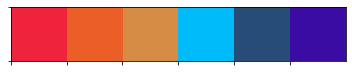

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#EF233C","#eb5e28","#d68c45","#00bbf9","#274c77","#3a0ca3"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

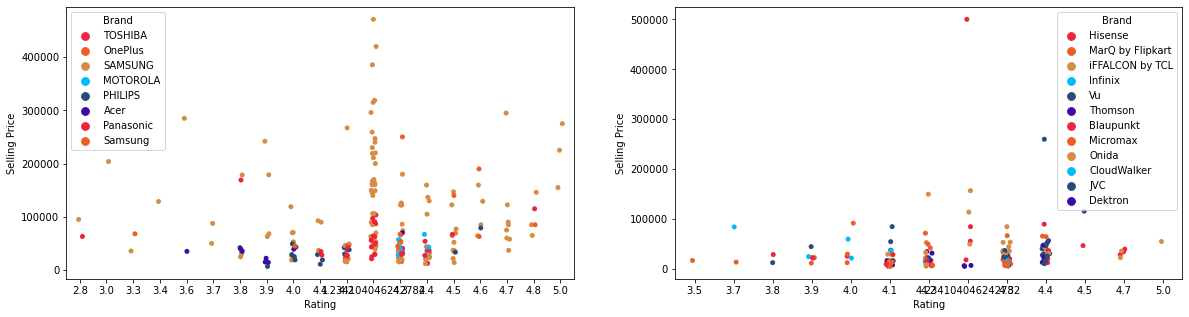

In [20]:
list1 = ["SONY","OnePlus","Haier","TOSHIBA","MOTOROLA","Acer","Compaq",
        "KODAK","LG","realme","SAMSUNG","Nokia","Panasonic","PHILIPS","Samsung","Coocaa"]

list2 = ["Hisense","Thomson","Onix","Dektron","iFFALCON by TCL","MarQ by Flipkart","Nokia","Blaupunkt","Weston","TCL",
        "Infinix","Sanyo","Intex","IMPEX","Croma","HUIDI","CloudWalker","Lloyd","Candes","Detel","LumX","JVC","Micromax","Onida",
        "Vu","Sansui"]
series1 = data["Brand"].isin(list1)
series2 = data["Brand"].isin(list2)
data_f1= data[series1]
data_f2= data[series2]
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
ax1 = sns.stripplot(x="Rating", y="Selling Price", data=data_f1,hue="Brand", palette=colors,ax=axs[0])
ax2 = sns.stripplot(x="Rating", y="Selling Price", data=data_f2,hue="Brand", palette=colors,ax=axs[1])

In [19]:
round(data.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False),1)

Brand
Sharp               149672.0
Samsung             121630.0
SAMSUNG             106409.2
LG                   96914.4
Hisense              89795.4
SONY                 89342.8
TCL                  55798.3
iFFALCON by TCL      54234.4
Panasonic            53494.0
Akai                 52002.8
OnePlus              47375.8
Vu                   46649.9
Compaq               45999.0
Sanyo                45499.0
Weston               43390.0
Oxygen               40326.3
Nokia                38862.6
TOSHIBA              38852.8
MOTOROLA             38399.0
Sansui               37671.9
Haier                36616.2
AISEN                35462.5
BPL                  34617.2
Onix                 34216.2
Lloyd                34161.8
PHILIPS              34113.8
JVC                  32496.3
CloudWalker          32331.3
Acer                 31664.7
Mi                   30787.1
Power Guard          30509.7
Onida                29707.2
IMPEX                28819.4
Intex                27340.7
Micromax